<h1 style="color:rgb(0,120,170)">Assignment 7: Cluster Analysis</h1>

<h3 style="color:rgb(0,120,170)">Task 1 (60 points):</h3> 

Complete the implementation of the $k$-means algorithm using the provided skeleton. 

You will have to implement:
* a) Initialization of the centers of the clusters
* b) Distance measure (Euclidean)
* c) Cluster assignment and loss computation
* d) Cluster center computation (mean and median)
* e) Convergence criterion function taking into account maximum number of iterations and changes in the clusters assignments
* f) Core part of the algorithm in the ```fit``` function

Plotting functions are provided.

You can of course ignore the (overly complicated) skeleton and implement your own version of plotting functions and the $k$-means algorithm as long as the requirements 'a' to 'f' are fulfilled and the questions are correctly answered.

Use the data given in `cluster0.csv`. The third column of the data are the labels. Use them only to compare original labeling and results of the algorithm.

Tasks:
* 1a: Run with different numbers of clusters from $k=3$ to $k=7$, using "mean" for the cluster center computation. Plot results and report loss value after convergence.
* 1b: For $k=5$, after each iteration, plot cluster assignments and report loss value.
* 1c: Run with two different methods of computing the centers of the clusters (mean and median). Additionally, for $k=4$ to $k=7$, plot the evolution of the loss across iterations until convergence.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil, sqrt

In [2]:
class KMeansClustering:
    '''
    K-Means clustering implementation
    '''
    def __init__(self, k=2, dist='Euclidean', method = 'mean'):
        '''
        Class constructor
        @param int k: Number of clusters to generate (default 2)
        @param string dist: Distance measure (default 'Euclidean')
        @param string method: Measure to compute the center of the clusters (default 'mean')
        '''
        self.k = k
        self.dist = dist
        self.center_method = method
        self.max_iter = 30
        self.old_loss = 0 # For the convergence criteria
        
       
    def convergence(self, i, n_changes, max_iter):
        '''
        Checks the convergence criteria
        Returns true if a convergence condition is reached, false otherwise
        @param int i: current iteration
        @param int n_changes: number of datapoints that changed the cluster assignment in the last iteration
        @param int max_iter: maximum number of iterations
        '''
        # Implement your own version of convergence taking into account:
        # Return "true", if maximum number of iterations is reached or no datapoints changed after the last cluster assignment
# TO DO
        if i == max_iter:
            return True
        if n_changes == 0:
            return True
        return False
# END TO DO


    def center_initialization(self):
        
        '''
        Initializes the centers by creating them randomly within the feature space (use maxes and mins)
        Uses self.d for the dimensionality of the data
        Uses self.k for the number of clusters
        Uses self.centers[i,j] for the dimension "j" of the cluster "i"
        '''
        # Max and min feature values
        maxes = np.amax(self.dataset, axis=0) # gives us the biggest row
        mins = np.amin(self.dataset, axis=0) # get the minium for each dimension
        
# TO DO
        final_list = []
    
        nest = []
        for nn,mm in zip(mins,maxes):
            nest.append(tuple((nn,mm)))
            
        for c in range(self.k):

            random_matrix = np.random.uniform(*np.transpose(nest))

            random_list = list(random_matrix)
            final_list.append(random_list)
        self.centers = np.array(final_list)# matrix with rows=clusters
        return
# END TO DO


    def distance(self, s1, s2, dist='Euclidean'):
        '''
        Returns the distance between two given samples for a given distance measure (dist='Euclidean')
        @param array s1: data point 1
        @param array s2: data point 2
        @param string dist: distance measure
        '''

        if len(s1) == len(s2):
# TO DO
            if dist == 'Euclidean':
                try: 
                
                    return np.linalg.norm((s1-s2))
                except:
                  
                    raise TypeError('distance measure couldn\'t be implemented in np.linalg.norm')
                    
            else:
                print(f'Other distance measure: {dist}!!!!')
                try: 
                
                    return np.linalg.norm((s1-s2),ord=dist)
                
                except:
                   
                    raise TypeError('distance measure couldn\'t be implemented in np.linalg.norm')

                
        raise Error('x not comparable to cluster because they have different lengths')
            
# END TO DO


    def assign_clusters(self):

        '''
        Computes to which cluster each sample currently belongs to 
        Adds the distance to the loss
        Returns number of newly assigned labels (new_assigned) and the loss (eq. 1 in exercise slides)
        '''
        old_labels = list(self.labels)
        loss = 0
        # Compute distance for each datapoint with respect to the centers.
        # Use self.dataset for the dataset
        # Assign the new clusters for a sample taking the min distance to the centers.
        # Use self.labels[i] for the current cluster of the i-th sample
        # Add the quadratic distance to the loss
# TO DO

        for ind_x, x in enumerate(self.dataset):

            minimal_dist = float('inf')
            found_c_ind = -1
   
            for ind_c, c in enumerate(self.centers):
                found_dist = self.distance(x, c, dist=self.dist)
                if found_dist < minimal_dist:
                    minimal_dist = found_dist
                    found_c_ind = ind_c 
            
            self.labels[ind_x] = found_c_ind
                
            loss += minimal_dist**2
            
                
# END TO DO           
        # Here we save labels and centers for plotting each iteration    
        if self.plot_steps: 
            self.clust_hist.append(np.copy(self.labels))
            self.center_hist.append(np.copy(self.centers))
        return [np.sum(old_labels != self.labels),loss]


    def compute_centers(self):

        '''
        Computes new cluster centers according to the current samples in each cluster
        
        '''
        # After the call of this function, self.centers[i] should contain the center of the i-th cluster 
        # self.center_method defines the way of computing the centers (values: 'mean' or 'median')
# TO DO
        self.centers = []
    
        for cluster_number in range(self.k): 
            ind_samples_specific_cluster = np.where(self.labels==cluster_number)
            xes_of_cluster_c = self.dataset[ind_samples_specific_cluster]
            xes_of_cluster_c = xes_of_cluster_c.T # row=features, column=x_i
           

            if self.center_method == 'median':
                cluster_vec = np.median(xes_of_cluster_c,axis=1) # get median for each row

                                            
            else: # we have mean
                cluster_vec = np.mean(xes_of_cluster_c,axis=1) # get mean for each row
            
            cluster_vec = cluster_vec.reshape((1,cluster_vec.shape[0]))
            
            if len(self.centers) == 0:
                self.centers = cluster_vec

                
            else:
                self.centers = np.concatenate((self.centers,cluster_vec))

          
        return
                                            
# END TO DO

            
    def fit(self, dataset, labels=None, plot='plot_all', max_iter=10):
        '''
        Fits the model to the input dataset. 
        Stops by using the function self.convergence()
        @param np.array dataset matrix of feature vectors (samples, features)
        @param array labels: the actual labels, if known; used to compare the estimated result with the real one
        @param string plot: plot all iterations or after convergence or nothing ('plot_all', 'plot_convergence', 'none') 
        @param maxiter: number of maximum iterations
        @return float loss: the loss after convergence
        '''
        self.dataset = dataset
        self.plot_steps = plot
        self.labels_actual = labels
        # Save intermediate solutions if we have to plot them later
        self.clust_hist = []
        self.center_hist = []
        self.labels = np.zeros(dataset.shape[0])
        # Sample dimensionality
        self.d = dataset.shape[1]
        # Randomize centers
        self.centers = np.zeros((self.k, self.d)) 
        self.center_initialization()
        self.loss_hist = [] # List that stores the evolution of the loss across iterations
        # While not converged, assign clusters, get loss, and compute new centers
# TO DO
        i = 0
        n_changes = -1 # can be any number except 0
        
        while self.convergence(i, n_changes, max_iter) == False:
            
            n_changes, loss = self.assign_clusters() # self.labels changed

            self.compute_centers() # self.centers changed


            self.loss_hist.append(loss)

            
            i+=1
        

# END TO DO
        if self.plot_steps=='plot_all':
            self.plot_substeps()
        elif self.plot_steps=='plot_convergence':
            self.plot_convergence()
        elif self.plot_steps=='none':
            return loss
        else:
            plot_dataset(self.dataset, self.labels, self.centers)
        print("Final loss: {}".format(loss))
        return loss

    
    def plot_convergence(self):
        '''
        Plots only the original and results after convergence
        '''
        xfmax = np.max(self.dataset[:,0]) + 0.1
        xfmin = np.min(self.dataset[:,0]) - 0.1
        yfmax = np.max(self.dataset[:,1]) + 0.1
        yfmin = np.min(self.dataset[:,1]) - 0.1
        fig, ax = plt.subplots(1, 2)
        fig.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.suptitle('K-means algorithm results ({:d} clusters, {:s} distance, method {:s})'.format(
            self.k,self.dist, self.center_method),
                    fontsize=12)
        # Plot original dataset first
        ax[0].set_xlim([xfmin, xfmax])
        ax[0].set_ylim([yfmin, yfmax])
        ax[0].set_aspect('equal')
        ax[0].set_title('Original dataset')
        if self.labels_actual is not None:
            subsets = split_labeled_set(self.dataset, self.labels_actual)
            for label, subset in subsets.items():
                ax[0].scatter(subset[:,0], 
                                subset[:,1], 
                                label='c={:d}'.format(int(label)))
        else:
            ax[0].scatter(self.dataset[:,0], self.dataset[:,1])
        s = [50 for _ in range(self.k)] # Center sizes
        
        last_iter = len(self.clust_hist)-1
        subsets = split_labeled_set(self.dataset, self.clust_hist[last_iter])
        for label, subset in subsets.items():
            ax[1].scatter(subset[:,0], subset[:,1], label='c={:d}'.format(int(label)))

        
        ax[1].scatter(self.center_hist[last_iter][:,0], 
                        self.center_hist[last_iter][:,1], 
                        c='k', 
                        marker='x', 
                        s=s)
        ax[1].set_xlim([xfmin, xfmax])
        ax[1].set_ylim([yfmin, yfmax])
        ax[1].set_xlabel('x1')
        ax[1].set_ylabel('x2')
        ax[1].set_aspect('equal')
        ax[1].set_title('Iteration {:d}'.format(int(last_iter+1)))
        
        plt.show()
        
    
    def plot_substeps(self):
        '''
        Plots all substeps (cluster computations) to reach the solution
        '''
        total_steps = len(self.clust_hist)
        if (total_steps > 15):
            print("Too many steps to plot. Please run the program again")
            plot_dataset(self.dataset, self.labels, self.centers, 
                         'k-means: Labeling after {:d} steps'.format(total_steps) + 
                         '\n(too many steps to show, run the program again)')
            return
        n_cols = 2
        n_rows = max(2, ceil((len(self.clust_hist)+1)/n_cols))
        xfmax = np.max(self.dataset[:,0]) + 0.1
        xfmin = np.min(self.dataset[:,0]) - 0.1
        yfmax = np.max(self.dataset[:,1]) + 0.1
        yfmin = np.min(self.dataset[:,1]) - 0.1
        #fig, ax = plt.subplots(n_rows, n_cols, figsize=( 2*n_rows,n_cols*2*n_rows))
        fig, ax = plt.subplots(n_rows, n_cols, figsize=(5,3.5*n_rows))
        fig.tight_layout()
        plt.subplots_adjust(top=0.95)
        plt.suptitle('K-means algorithm substeps ({:d} clusters, {:s} distance, method: {:s})'.format(
            self.k,self.dist, self.center_method),
                    fontsize=12)
        # Plot original dataset first
        ax[0,0].set_xlim([xfmin, xfmax])
        ax[0,0].set_ylim([yfmin, yfmax])
        ax[0,0].set_aspect('equal')
        ax[0,0].set_title('Original dataset')
        if self.labels_actual is not None:
            subsets = split_labeled_set(self.dataset, self.labels_actual)
            for label, subset in subsets.items():
                ax[0,0].scatter(subset[:,0], 
                                subset[:,1], 
                                label='c={:d}'.format(int(label)))
        else:
            ax[0,0].scatter(self.dataset[:,0], self.dataset[:,1])
            
        s = [50 for _ in range(self.k)] # Center sizes
        # Iterate through steps and plot labeled dataset
        i = 0
        cur_iter = 0
        while(cur_iter < n_rows*n_cols-1):
            j = 1 if i == 0 else 0
            while j < n_cols:
                if cur_iter < total_steps:
                    subsets = split_labeled_set(self.dataset, self.clust_hist[cur_iter])
                    for label, subset in subsets.items():
                        ax[i,j].scatter(subset[:,0], subset[:,1], label='c={:d}'.format(int(label)))
                    ax[i,j].scatter(self.center_hist[cur_iter][:,0], 
                                    self.center_hist[cur_iter][:,1], 
                                    c='k', 
                                    marker='x', 
                                    s=s)
                    ax[i,j].set_xlim([xfmin,xfmax])
                    ax[i,j].set_ylim([yfmin,yfmax])
                    ax[i,j].set_xlabel('x1')
                    ax[i,j].set_ylabel('x2')
                    ax[i,j].set_aspect('equal')
                    ax[i,j].set_title('Iteration {:d}'.format(int(cur_iter+1)))
                    #ax[i,j].legend(loc='upper right')
                else:
                    ax[i,j].axis('off')
                j += 1
                cur_iter += 1
            i += 1
        plt.show()
        
        plt.plot(self.loss_hist,label='loss') # plotting by columns
        plt.title('Loss vs number of iterations')
        plt.show()

In [3]:
def split_labeled_set(X, y):
    '''
    Given a two-dimensional multiclass labeled dataset, with n classes, returns n single-class subsets
    @return dict: a dictionary with labels in its keys and subsets (matrices) for the given label in its values
    '''
    if X.shape[1] != 2:
        raise Exception("Can only plot two-dimensional datasets")
    labels = set(y)
    subsets = {}
    for l in labels:
        indices = np.where(y == l)[0]
        subset_x1 = X[:,0][indices]
        subset_x2 = X[:,1][indices]
        subset = np.column_stack((subset_x1, subset_x2))
        subsets[l] = subset
    return subsets

In [4]:
def plot_dataset(features, labels, centers=None, title=''):
    subsets = split_labeled_set(features, labels)
    for label, subset in subsets.items():
        plt.scatter(subset[:,0], subset[:,1], label='cluster {:d}'.format(int(label)))
    if centers is not None:
        s = [50 for _ in range(len(labels))]
        
        print(len(labels), centers.shape)
        
        
        
        plt.scatter(centers[:,0], centers[:,1], c='k', marker='x', s=s)
    plt.legend()
    
    xfmax = np.max(features[:,0]) + 0.5
    xfmin = np.min(features[:,0]) - 0.5
    yfmax = np.max(features[:,1]) + 0.5
    yfmin = np.min(features[:,1]) - 0.5
    plt.xlim(xfmin, xfmax)
    plt.ylim(yfmin, yfmax)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.show()

In [5]:
# Load data and create the run function
data = np.loadtxt(open('cluster0.csv', 'r'), delimiter=',', skiprows=1)

X = data[:, :2] # Matrix of feature vectors
y = data[:, -1] # Target values (labels)
loss = 0

def run(k,dist,plot,method):
    '''
        Runs the algorithm.
        Returns the loss of the last iteration, and a list with the losses per iteration (for the last trial)
        @param int k: number of clusters
        @param string dist: distance measure ('Euclidean', 'Manhattan')
        @param string plot: what to plot ('plot_convergence', 'plot_all')
        @param int n_tries: number of trials 
        @param string method: method to compute the centers of the cluster 
    '''
    kmeans = KMeansClustering(k,dist,method)
    # Run k-means and plot intermediate steps
    loss = kmeans.fit(X, y, plot)
    return [loss,kmeans.loss_hist]


<h3 style="color:rgb(0,120,170)">Task 1a:</h3>

Run the algorithm for different numbers of clusters ($k$ = 3, 4, 5, 6 and 7) using the mean to compute the centers of the clusters.

For each $k$, plot the original labels and the results after convergence. Report also the final loss.

Questions:

* What do you observe?
* How does the final loss change using different $k$? Why?
* Do you get the same results if you run again? Why?


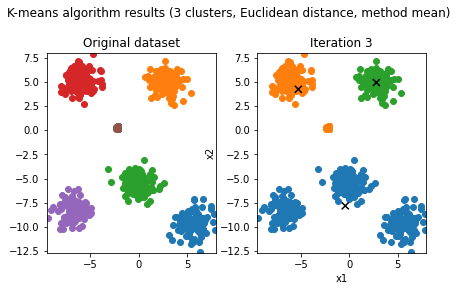

Final loss: 10185.121177235911


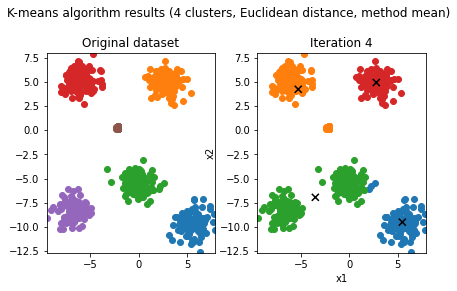

Final loss: 4275.7937354588885


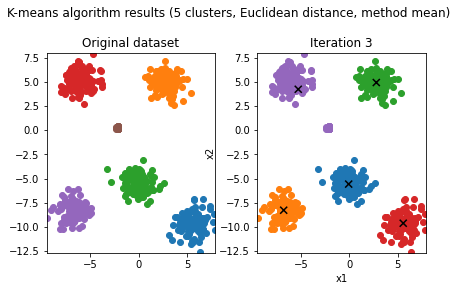

Final loss: 1685.6908061741194


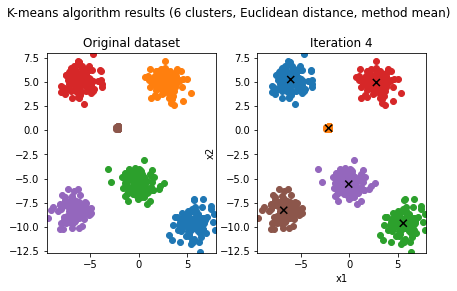

Final loss: 873.3306967516528


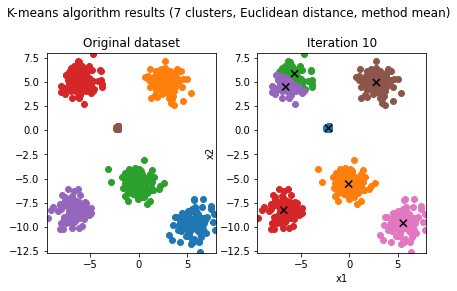

Final loss: 806.6296798567777


In [6]:
# Begin your code

for k in [3,4,5,6,7]:
    Class = KMeansClustering(k=k, dist='Euclidean', method = 'mean')
    Class.fit(dataset=X, labels=y, plot='plot_convergence', max_iter=10)

# End your code

<h3 style="color:rgb(208,90,80)">Question 1a:</h3>

Your answer here.

* When we assume the same number of clusters as they actually are AND have good starting points for the centers the k-means finds all clusters perfectly and the loss is the lowest in this case.
* The loss describes the distance that the centers have to their assigned cluster points. When the points are near to their centers the loss is lower. The closest to the aim we are when we have as much clusters as cluster centers. When we have more centers than clusters it can happen that a very small cluster has less impact on one center than one bigger cluster to two centers such that the k-means algorithm doesn't count the small cluster as cluster.
* No, because at every run we have different random starting states. The nearer a center starts at a cluster/accumulation of points the higher the probability that the center will wandern to these cluster/accumulation of point.

<h3 style="color:rgb(0,120,170)">Task 1b:</h3>

For $k=5$, plot cluster assignments and loss value after each iteration.

Question:
* What do you observe?


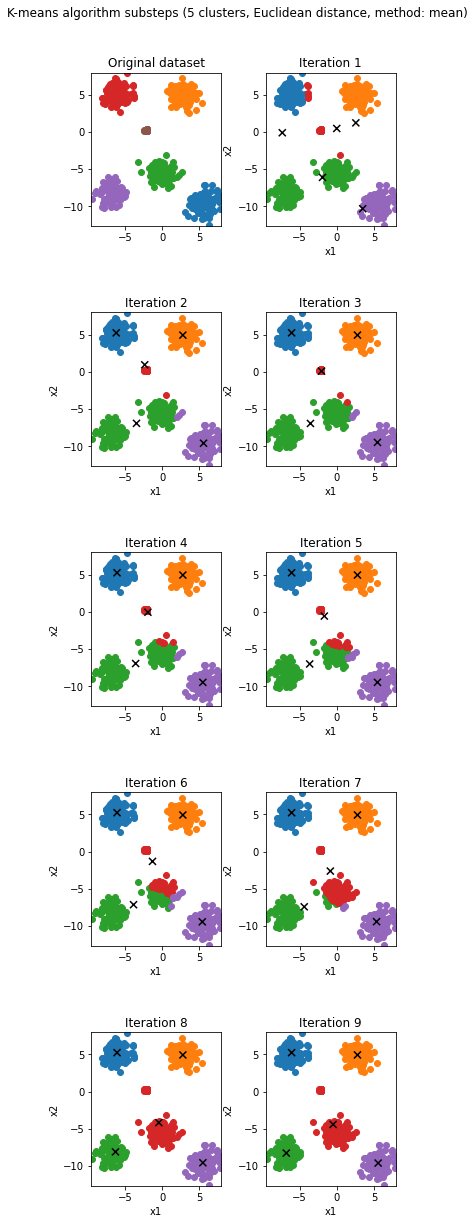

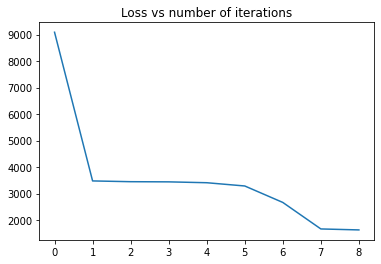

Final loss: 1627.6013977382427


1627.6013977382427

In [7]:
# Begin your code
k = 5
Class = KMeansClustering(k=k, dist='Euclidean', method = 'mean')
Class.fit(dataset=X, labels=y, plot='plot_all', max_iter=10)

# End your code

<h3 style="color:rgb(208,90,80)">Question 1b:</h3>

Your answer here.

With each iteration the loss shrinks. Depending on the starting locations of the centers the algorithm needs different number of iterations until it is ready with convergent behaviour.

<h3 style="color:rgb(0,120,170)">Task 1c:</h3>
 

This task will show how two different methods of computing the center (mean and median) affect the loss during iterations. To that end, run the algorithm and store the evolution of the loss per iteration for both methods.

Because the $k$-means algorithm is very sensitive to the initialization of the centers, repeat the process 100 times (100 trials) -- 1000 if you have the computing power --, and compute the loss average over all trials for each iteration and each method. To take into account that each trial might need a different number of iterations to converge. In such a case, pad the sequence with the converged value (the last value).

Plot the average loss versus iteration number for both the mean and the median method, using $k$ = 2, 5 and 8.

Question:
* What do you observe?



Mean average loss over 100 runs:
 [38218.97037025 19133.52403817 17616.85130748 16993.84054012
 16738.73903222 16503.26473634 16238.93702881 16215.06182419
 16215.06182419 16215.06182419]

Median average loss over 100 runs:
 [37281.41186181 21056.59354867 17943.48386286 16180.05077698
 14331.43600712 13959.62027004 13959.74677677 13959.74677677
 13959.74677677 13959.74677677]


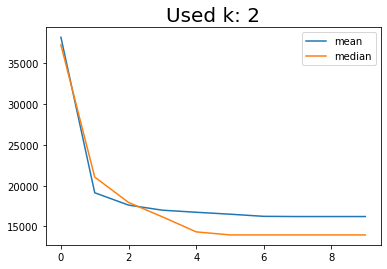

/home/c/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/c/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Mean average loss over 100 runs:
 [14302.76255082  4780.85168194  3545.04055167  3178.47584033
  2979.34537803  2858.34464761  2788.26785401  2731.73945086
  2660.58479837  2599.53670733]

Median average loss over 100 runs:
 [15173.77121999  4974.71628768  3974.96210439  3705.56693383
  3576.71027105  3414.95200297  3360.58000207  3322.44980343
  3265.55375499  3240.68582437]


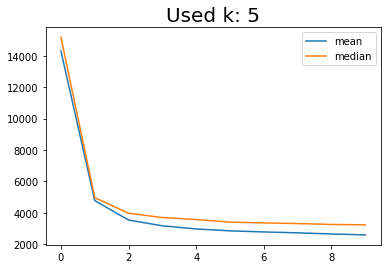

/home/c/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/c/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Mean average loss over 100 runs:
 [9054.94854128 2095.55065942 1403.51103967 1249.36053349 1172.09668738
 1120.05662354 1077.22488124 1063.30898877 1062.29129678 1061.78244447]

Median average loss over 100 runs:
 [9613.68391228 2090.3541049  1573.05914772 1358.7296092  1288.25990241
 1184.74441269 1126.1922366  1085.63968981 1074.00361955 1044.70539669]


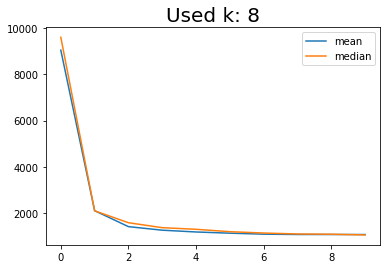

In [8]:
# Begin your code
import random
random.seed(12)
max_iter = 10

for k in [2,5,8]:
    for meth in ['mean','median']:
        Class = KMeansClustering(k=k, dist='Euclidean', method = meth)

        
        trial = 0
        while trial < 100:
            
                
            
            Class.fit(dataset=X, labels=y, plot='none', max_iter=max_iter)
        
            list_loss_each_iter = Class.loss_hist
            
            while len(list_loss_each_iter) < max_iter:
                list_loss_each_iter.append(list_loss_each_iter[-1])
            
            array_loss_each_iter = np.array(list_loss_each_iter)
            
            if trial == 0: 
                trial_loss =  array_loss_each_iter
            else:
                trial_loss = np.add(trial_loss, array_loss_each_iter)
    
            

            trial += 1
            
        if meth == 'mean':
            mean_average_loss_each_iter = trial_loss/100  
        else:
            median_average_loss_each_iter = trial_loss/100 
            
    print('Mean average loss over 100 runs:\n',mean_average_loss_each_iter)
    print('\nMedian average loss over 100 runs:\n',median_average_loss_each_iter)

    plt.plot(mean_average_loss_each_iter)
    plt.plot(median_average_loss_each_iter)
    plt.legend(['mean','median'])
    plt.title(f'Used k: {k}', size=20)
    plt.show()
# End your code


<h3 style="color:rgb(208,90,80)">Question 1c:</h3>

Your answer here.

Both variantes are similar good. However, in this case, when only having 2 cluster centers k the median seems to better. Else the mean seems to be slightly better.

<h3 style="color:rgb(0,120,170)">Task 2 (40 points):</h3> 

Use the data given in `cluster1.csv`, `cluster2.csv`, `cluster3.csv` and `cluster4.csv` to compare affinity propagation clustering with $k$-means clustering. Omit the third column of each data set since it contains the labels. Use $k = 2,3,4$ for $k$-means and plot your results. 

For affinity propagation you can use `AffinityPropagation` from `sklearn.cluster`. Use the default method ``affinity = euclidean`` (note that this is the negative squared Euclidean distance). For the preference, try the negative squared minimum, negative squared median, and negative squared maximum distance of the data points.

For the $k$-means algorithm you can either use your own implementation from Task 1 or use `KMeans` from `sklearn.cluster`. In any case, keep using the (standard) Euclidean distance.

Use the provided labels to determine which algorithm and which number of clusters give better results on a specific data set and explain why one algorithm might have an advantage over the other one.

Questions:
* Which method is faster?
* Which method performs best in each dataset?
* Is any dataset not "solved" by the $k$-means or Affinity Propagation? Why? Which parameters could be modified for improvement?

In [9]:
# Begin your code (multiple cells)
random.seed(0)
def label_eval(labels, clabels):
    # E. g. it can happen that x0 is assigned to 3 but labels have value 0. However, it can be correct 
    # when only the order of labeling is mixed up.
    # Therefore, take the biggest found clusters and translate them into the original labels:
    if len(set(labels)) > len(set(clabels)):
        remaining = set(labels) - set(clabels)
        bad = 0
        for i in remaining:
            
            bad += len(np.where(labels==i)[0])
        good = len(labels) - bad
        return  (good/len(labels))

    len_cl_list = []
    for cl in set(clabels):
        len_cl_list.append(len(np.where(clabels == cl)[0]))



    biggest_classes = []
    ind = 0
    for i in set(labels):
        if ind < len(set(clabels)):
            biggest_class = len_cl_list.index(max(len_cl_list))
            len_cl_list[biggest_class] = 0
            biggest_classes.append(biggest_class)
        ind += 1


    # Replace the biggest classes by letters:
    final = []
    replacer = []

    len_cl_ar = np.array(len_cl_list)
    for ind,b in enumerate(biggest_classes):
        # change the label titel of the biggest class of Class.labels:
        find_samples_ind = np.where(clabels == b)
        clabels[find_samples_ind] = - ind -1


        # Modify the given labels:
        try:
            first_same_sample_ind = find_samples_ind[0][0]
        except:
            return len(np.where(labels==clabels))/len(labels)
        get_label = labels[first_same_sample_ind]

        change_index = np.where(labels == get_label)

        labels[change_index] = - ind -1


    # Now the labels are comparable with the Class.label
    # Now it is possible to test if x_i belongs to the same class:
    
    frac = len(np.where(labels == clabels)[0])/len(labels)
    return frac


########## Current data: cluster1.csv ################

--- k-means for k = 2 ---


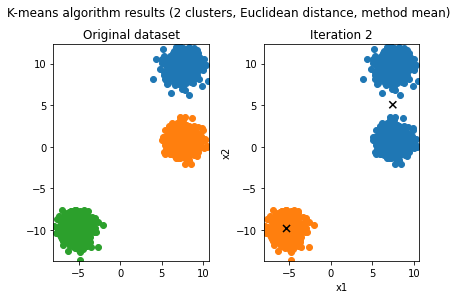

Final loss: 22097.59924315246
estimated proportion of right labels: 0.6664442961974649

--- k-means for k = 3 ---


/home/c/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/c/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


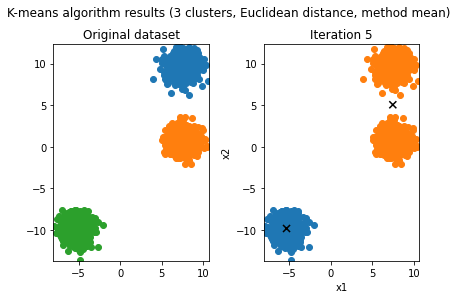

Final loss: 22097.59924315246
estimated proportion of right labels: 0.6664442961974649

--- k-means for k = 4 ---


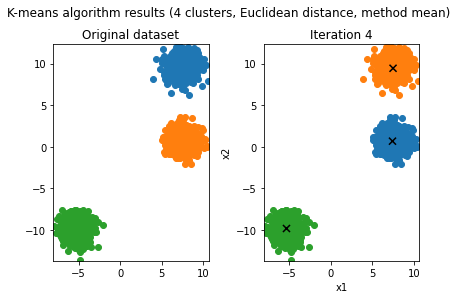

Final loss: 2955.612049027732
estimated proportion of right labels: 0.00066711140760507

 --- Affinity Propagation without preference input: ---


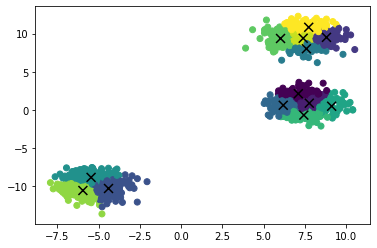

estimated proportion of right labels: 0.10140093395597065
########## Current data: cluster2.csv ################

--- k-means for k = 2 ---


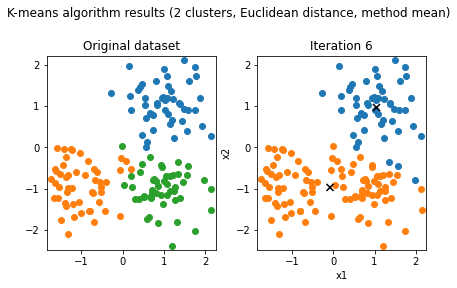

Final loss: 170.17542142450776
estimated proportion of right labels: 0.6644295302013423

--- k-means for k = 3 ---


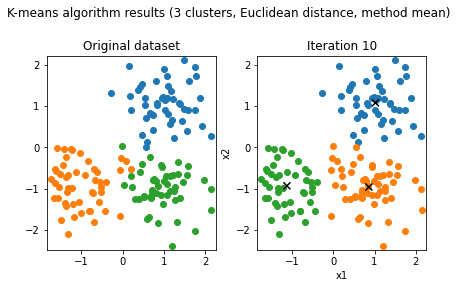

Final loss: 72.38836484598804
estimated proportion of right labels: 0.959731543624161

--- k-means for k = 4 ---


/home/c/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/c/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


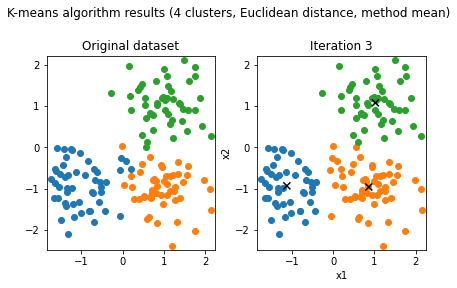

Final loss: 72.38836484598804
estimated proportion of right labels: 0.006711409395973154

 --- Affinity Propagation without preference input: ---


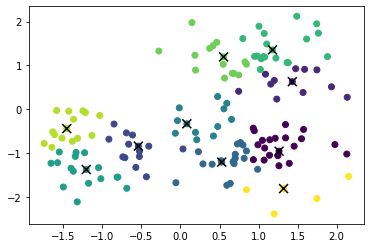

estimated proportion of right labels: 0.12751677852348994
########## Current data: cluster3.csv ################

--- k-means for k = 2 ---


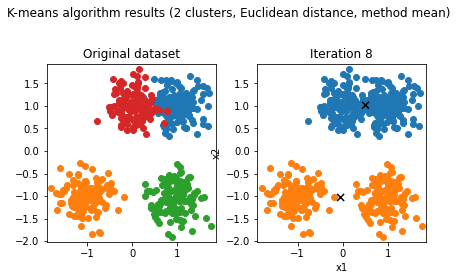

Final loss: 390.27591901268977
estimated proportion of right labels: 0.501002004008016

--- k-means for k = 3 ---


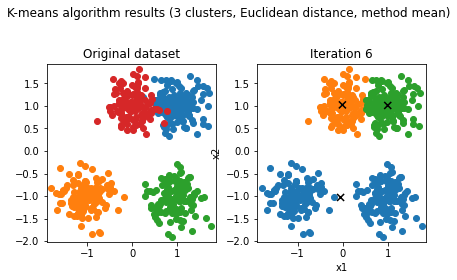

Final loss: 327.1510628781058
estimated proportion of right labels: 0.749498997995992

--- k-means for k = 4 ---


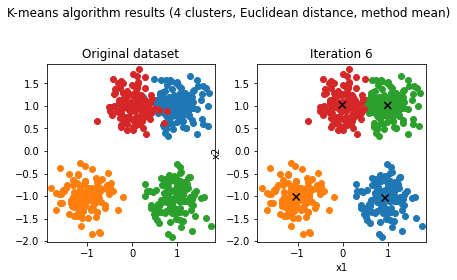

Final loss: 84.99710442423125
estimated proportion of right labels: 0.9879759519038076

 --- Affinity Propagation without preference input: ---


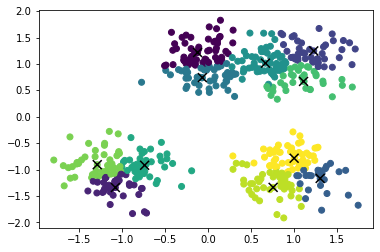

estimated proportion of right labels: 0.20641282565130262
########## Current data: cluster4.csv ################

--- k-means for k = 2 ---


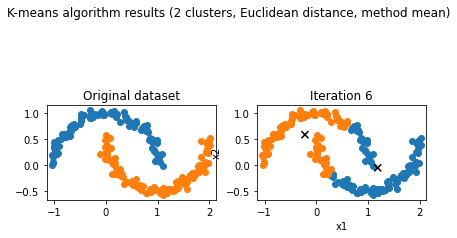

Final loss: 78.89376810609377
estimated proportion of right labels: 0.7437185929648241

--- k-means for k = 3 ---


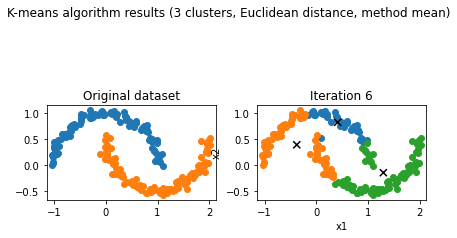

Final loss: 59.66073333428298
estimated proportion of right labels: 0.5728643216080402

--- k-means for k = 4 ---


/home/c/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/c/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


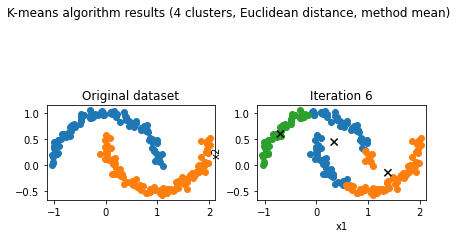

Final loss: 53.87859538864038
estimated proportion of right labels: 0.3768844221105528

 --- Affinity Propagation without preference input: ---


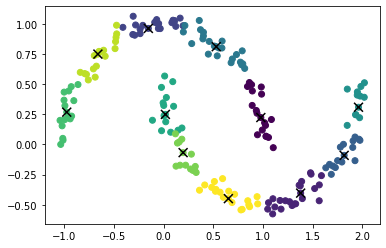

estimated proportion of right labels: 0.12060301507537688


In [10]:
from sklearn.cluster import AffinityPropagation
random.seed(12)
i = 1
while i < 5:

    data_task2 = np.loadtxt(open(f'cluster{i}.csv', 'r'), delimiter=',', skiprows=1)

    dataset = data_task2[:, :2] # Matrix of feature vectors
    labels = data_task2[:, -1] # Target values (labels)
    
    
    print(f'########## Current data: cluster{i}.csv ################')
    
    for k in [2,3,4]:
        print(f'\n--- k-means for k = {k} ---')
        


        Class = KMeansClustering(k=k, dist='Euclidean', method = 'mean')
        Class.fit(dataset=dataset, labels=labels, plot='plot_convergence', max_iter=10)
        

        
        right_labels = label_eval(labels, Class.labels)#len(np.where(af_labels == labels)[0])
        print(f'estimated proportion of right labels: {right_labels}')
        
    print(f'\n --- Affinity Propagation without preference input: ---')
    af = AffinityPropagation(affinity='euclidean',random_state=4, damping=0.7).fit(dataset)
    af_labels = af.labels_
   # af_projection = af.predict(dataset)
    af_centers_array = af.cluster_centers_
    plt.scatter(dataset[:,0],dataset[:,1],c=af_labels)
    s = [80 for i in range(af_centers_array.shape[0])]
    plt.scatter(af_centers_array[:,0], af_centers_array[:,1], c='black', marker='x', s=s)    
    plt.show()

    right_labels = label_eval(labels, af_labels)
    print(f'estimated proportion of right labels: {right_labels}')
    
    i += 1
    

In [11]:
def neg_sq_distance_matrix(dataset):
    distance_matrix = np.zeros((dataset.shape[0],dataset.shape[0]))
    
    for ind1,line in enumerate(dataset):
        
        if ind1 < (dataset.shape[0]-1):
            
            ind2 = ind1+1
            for other_line in dataset[ind1+1:]:
                
                norm = -sum((line-other_line)**2)
                
                distance_matrix[ind1][ind2] = norm
                distance_matrix[ind2][ind1] = norm

                ind2 +=1
    return distance_matrix


########## Affinity propagation |current data: cluster1.csv | negative squared minimum ################


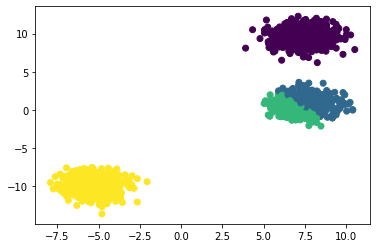

estimated proportion of right labels: 0.8472314876584389
########## Affinity propagation |current data: cluster2.csv | negative squared minimum ################


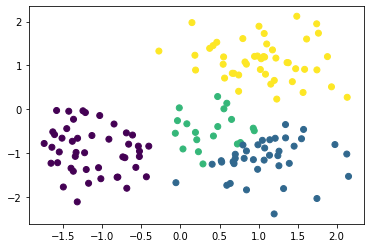

estimated proportion of right labels: 0.8657718120805369
########## Affinity propagation |current data: cluster3.csv | negative squared minimum ################


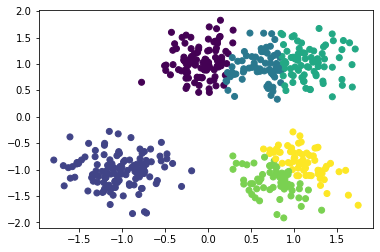

estimated proportion of right labels: 0.5430861723446894
########## Affinity propagation |current data: cluster4.csv | negative squared minimum ################


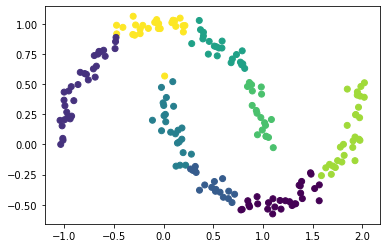

estimated proportion of right labels: 0.31155778894472363


In [12]:
#For the preference, try the negative squared minimum, negative squared median, 
#and negative squared maximum distance of the data point:
random.seed(12)
i = 1
while i < 5:
    data_task2 = np.loadtxt(open(f'cluster{i}.csv', 'r'), delimiter=',', skiprows=1)

    dataset = data_task2[:, :2] # Matrix of feature vectors
    labels = data_task2[:, -1] # Target values (labels)
    
    print(f'########## Affinity propagation |current data: cluster{i}.csv | negative squared minimum ################')
    
    
    # similarity matrix filled with negative squared distances:
    distance_matrix = neg_sq_distance_matrix(dataset)
    
                
    min_in_rows =np.min(distance_matrix,axis=1)

    af = AffinityPropagation(affinity='euclidean',random_state=4, damping=0.7,preference=min_in_rows).fit(dataset)
    af_labels = af.labels_
    plt.scatter(dataset[:,0],dataset[:,1],c=af_labels)

    plt.show()

    i += 1
    
    right_labels = label_eval(labels, af_labels)#len(np.where(af_labels == labels)[0])
    print(f'estimated proportion of right labels: {right_labels}')
    

########## Affinity propagation |current data: cluster1.csv | negative squared median ################


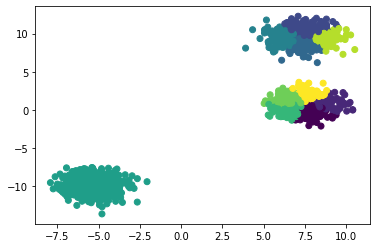

estimated proportion of right labels: 0.4703135423615744
########## Affinity propagation |current data: cluster2.csv | negative squared median ################


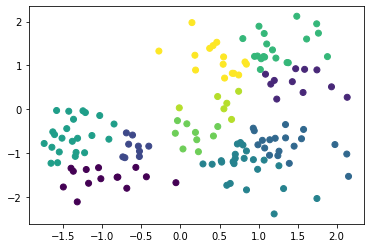

estimated proportion of right labels: 0.28187919463087246
########## Affinity propagation |current data: cluster3.csv | negative squared median ################


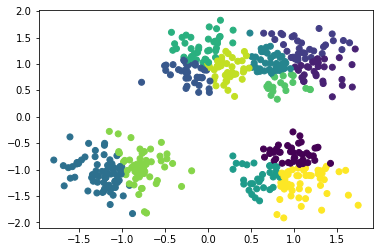

estimated proportion of right labels: 0.3727454909819639
########## Affinity propagation |current data: cluster4.csv | negative squared median ################


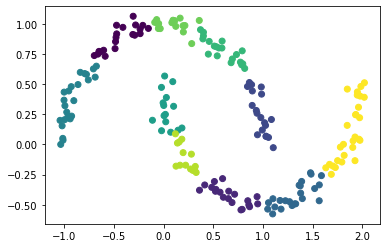

estimated proportion of right labels: 0.2613065326633166


In [13]:
#For the preference, try the negative squared minimum, negative squared median, 
#and negative squared maximum distance of the data point:
random.seed(12)
i = 1
while i < 5:
    data_task2 = np.loadtxt(open(f'cluster{i}.csv', 'r'), delimiter=',', skiprows=1)

    dataset = data_task2[:, :2] # Matrix of feature vectors
    labels = data_task2[:, -1] # Target values (labels)
    
    print(f'########## Affinity propagation |current data: cluster{i}.csv | negative squared median ################')
    
    
    # similarity matrix filled with negative squared distances:
    distance_matrix = neg_sq_distance_matrix(dataset)

                
    median_in_rows = np.median(distance_matrix,axis=1) # get median for each row
 

    af = AffinityPropagation(affinity='euclidean',random_state=4, damping=0.7,preference=median_in_rows).fit(dataset)
    af_labels = af.labels_

    plt.scatter(dataset[:,0],dataset[:,1],c=af_labels)
    plt.show()
    
    i += 1
    
    right_labels = label_eval(labels, af_labels)
    print(f'estimated proportion of right labels: {right_labels}')

########## Affinity propagation |current data: cluster1.csv | negative squared maximum distance ################


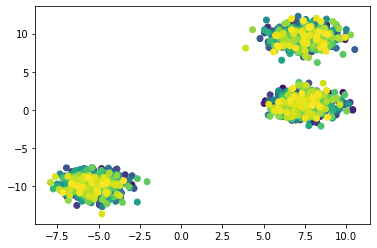

estimated proportion of right labels: 0.00133422281521014
########## Affinity propagation |current data: cluster2.csv | negative squared maximum distance ################


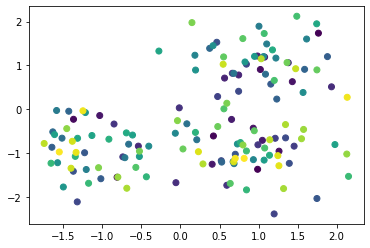

estimated proportion of right labels: 0.013422818791946308
########## Affinity propagation |current data: cluster3.csv | negative squared maximum distance ################


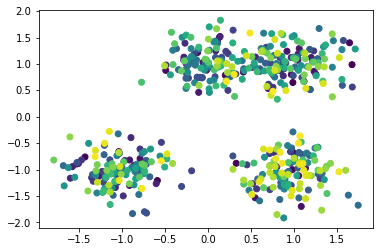

estimated proportion of right labels: 0.004008016032064128
########## Affinity propagation |current data: cluster4.csv | negative squared maximum distance ################


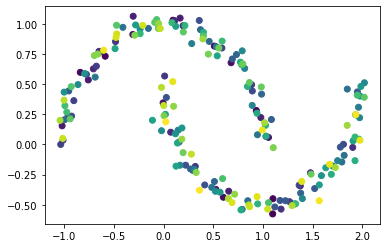

estimated proportion of right labels: 0.010050251256281407


In [14]:
#For the preference, try the negative squared minimum, negative squared median, 
#and negative squared maximum distance of the data point:
random.seed(12)
i = 1
while i < 5:
    data_task2 = np.loadtxt(open(f'cluster{i}.csv', 'r'), delimiter=',', skiprows=1)

    dataset = data_task2[:, :2] # Matrix of feature vectors
    labels = data_task2[:, -1] # Target values (labels)
    
    print(f'########## Affinity propagation |current data: cluster{i}.csv | negative squared maximum distance ################')
    
    
    # similarity matrix filled with negative squared distances:
    distance_matrix = neg_sq_distance_matrix(dataset)

                
    # change diagonal values to the smallest value of row
    max_in_rows =np.max(distance_matrix,axis=1)
    np.fill_diagonal(distance_matrix, min_in_rows )

    af = AffinityPropagation(affinity='euclidean',random_state=4, damping=0.7,preference=max_in_rows).fit(dataset)
    af_labels = af.labels_

    plt.scatter(dataset[:,0],dataset[:,1],c=af_labels)  
    plt.show()
    
    i += 1
    
    right_labels = label_eval(labels, af_labels)
    print(f'estimated proportion of right labels: {right_labels}')
# End your code (multiple cells)


<h3 style="color:rgb(208,90,80)">Question 2:</h3>

Your answer here.


* Solution: k-means not really faster.

* cluster1.csv: k-means algorithm with k = 3 <br>
cluster2.csv: affinity propagation with negative squared minima as preference <br>
cluster3.csv: k-means algorithm with k = 3 <br>
cluster4.csv: k-means algorithm wit k = 2 <br>

* cluster4.csv was the most problematic one. Because through the looking at the euclidean distances we always considering an circle around the current point. However, with this strategy we often get in the near distance for a current point samples from different labels! Therefore, affinity propagation has to make several small classes to avoid that. The hyperparameter 'preference' can improve the result for affinity propagation further. Here the 'negative squared minimum' was the best.